In [98]:
#Importing the Lib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,models,layers

In [99]:
#loading the dataset(it is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as
#shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listed below.

#0: T-shirt/top
#1: Trouser
#2: Pullover
#3: Dress
#4: Coat
#5: Sandal
#6: Shirt
#7: Sneaker
#8: Bag
#9: Ankle boot)
(training_images, training_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

9

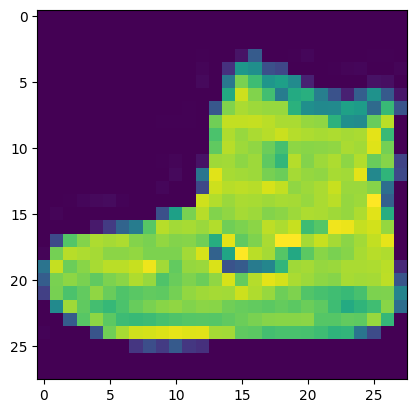

In [100]:
plt.imshow(training_images[0])
training_labels[0]

In [101]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot '''

'\n0 => T-shirt/top\n1 => Trouser\n2 => Pullover\n3 => Dress\n4 => Coat\n5 => Sandal\n6 => Shirt\n7 => Sneaker\n8 => Bag\n9 => Ankle boot '

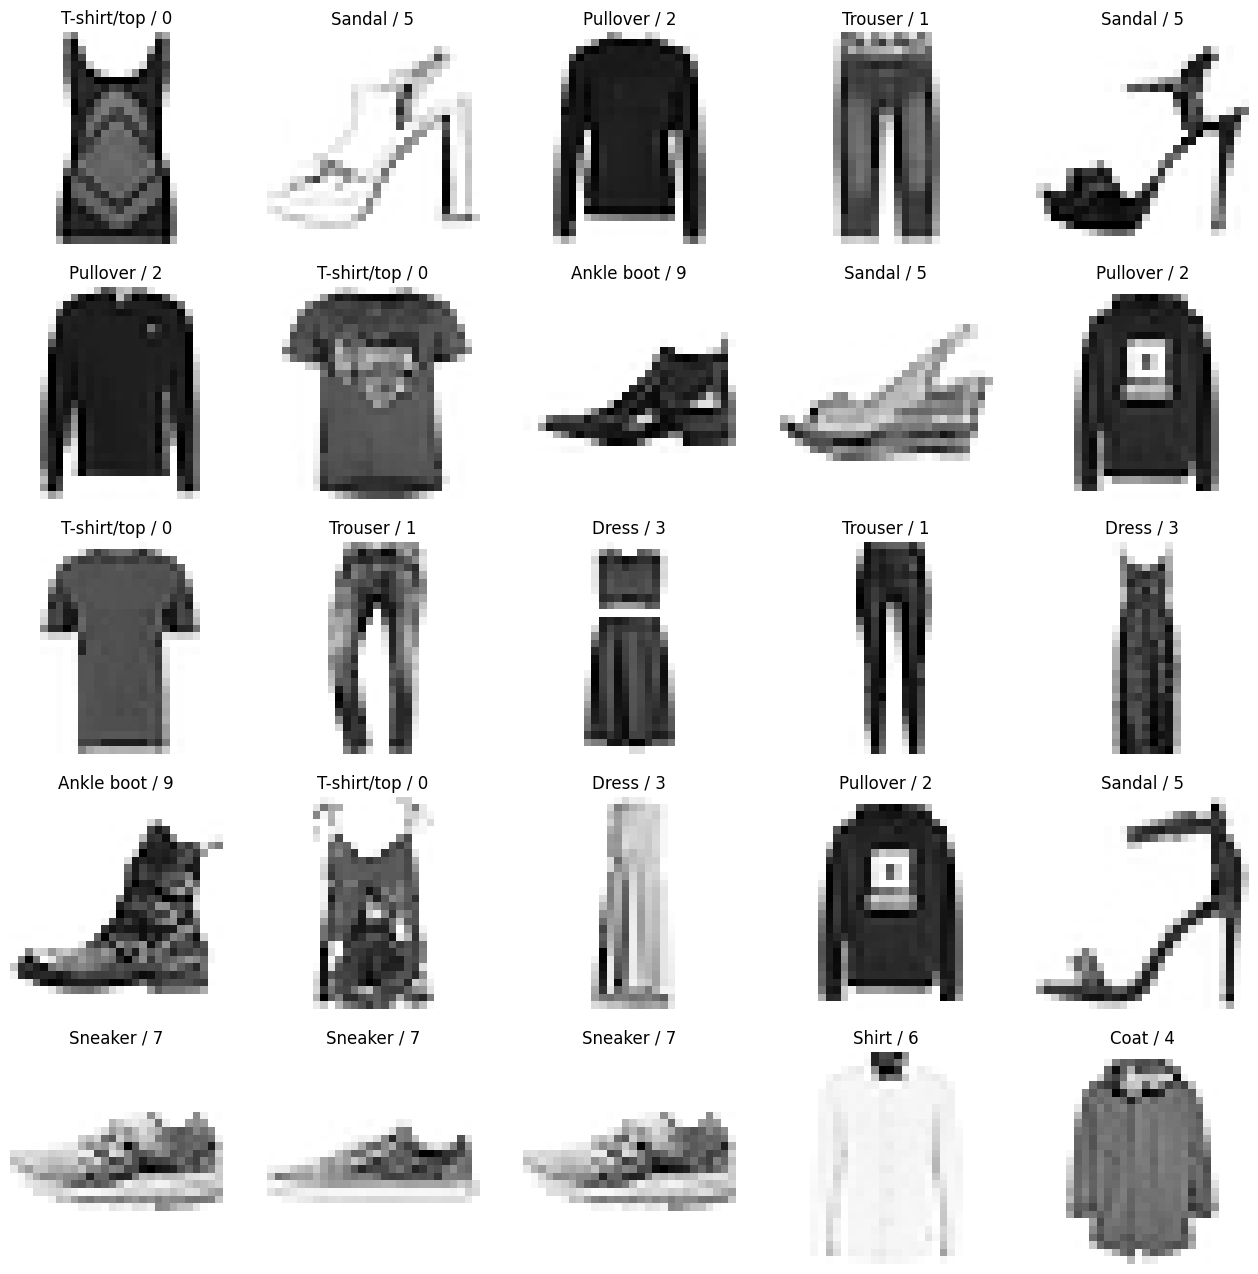

In [102]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(training_images[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[training_labels[i]], training_labels[i]))



In [103]:
#Reshaping the dataset
#training_images=training_images.reshape(60000,28,28,1)
#test_images=test_images.reshape(10000,28,28,1)

In [104]:
training_images[0] # image data in 2d numpy array shape 28x28 pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [105]:
training_labels[0]

9

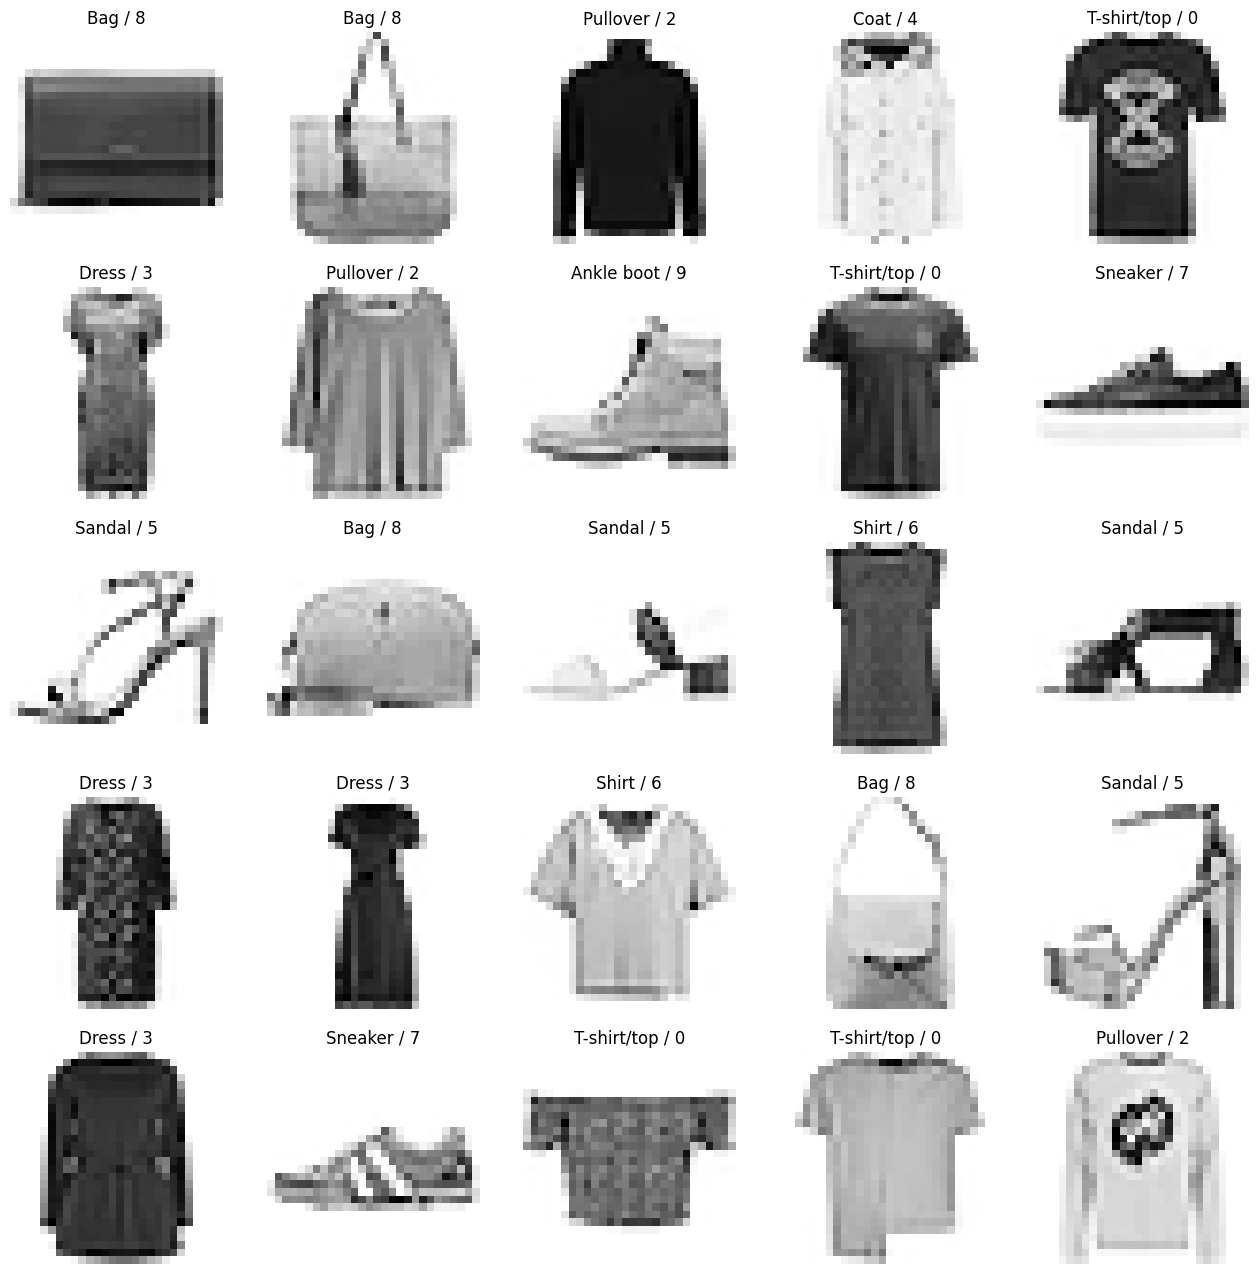

In [106]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(training_images[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[training_labels[i]], training_labels[i]))


In [107]:
#Normalizeing the dataset/Feature Scaling
training_images ,test_images = training_images / 255.0, test_images / 255.0

In [108]:
#Spliting the dataset as 80:20 then accuracy is=90.43%
#spliting the dataset as 90:10 then accuracy is=90.68%
#spliting the dataset as 70:30 then accuracy is=90.21%
#spliting the dataset as 60:40 then accuracy is=89.75%
from sklearn.model_selection import train_test_split
training_images, validation, training_labels, validation = train_test_split(training_images, training_labels, test_size= 0.1, random_state=2020)

In [109]:
training_images.shape,  training_labels.shape, validation.shape, validation.shape

((54000, 28, 28), (54000,), (6000,), (6000,))

In [110]:
#Defineing the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), #rectified linear activition unit
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [111]:
#compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#The difference between Sparse_categorical_crossentropy(the values are of more then '1',i;e 5,6,8)
            #and categorical_crossentropy(The values exactly '1')

In [112]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [113]:
#train the model
history = model.fit(training_images, training_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1688/1688 [==============================] - 95s 56ms/step - loss: 0.4484 - accuracy: 0.8381 - val_loss: 0.3695 - val_accuracy: 0.8606
Epoch 2/5
1688/1688 [==============================] - 94s 56ms/step - loss: 0.2980 - accuracy: 0.8910 - val_loss: 0.2897 - val_accuracy: 0.8962
Epoch 3/5
1688/1688 [==============================] - 92s 55ms/step - loss: 0.2544 - accuracy: 0.9057 - val_loss: 0.2972 - val_accuracy: 0.8943
Epoch 4/5
1688/1688 [==============================] - 94s 55ms/step - loss: 0.2213 - accuracy: 0.9170 - val_loss: 0.2715 - val_accuracy: 0.9014
Epoch 5/5
1688/1688 [==============================] - 92s 55ms/step - loss: 0.1933 - accuracy: 0.9276 - val_loss: 0.2506 - val_accuracy: 0.9064


In [114]:
y_pred = model.predict(test_images)
y_pred.round(2)

313/313 [==============================] - 5s 13ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.09, 0.03, 0.  ]], dtype=float32)

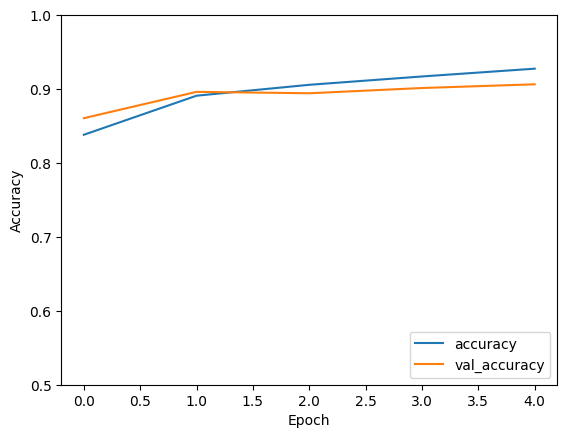

In [115]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.5,1)
plt.legend(loc='lower right')

In [116]:
model.predict(test_images)[0]
test_labels[0]

313/313 [==============================] - 4s 13ms/step


9

In [117]:
#Evaluating the model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 14ms/step - loss: 0.2506 - accuracy: 0.9064


[0.25060832500457764, 0.9064000248908997]

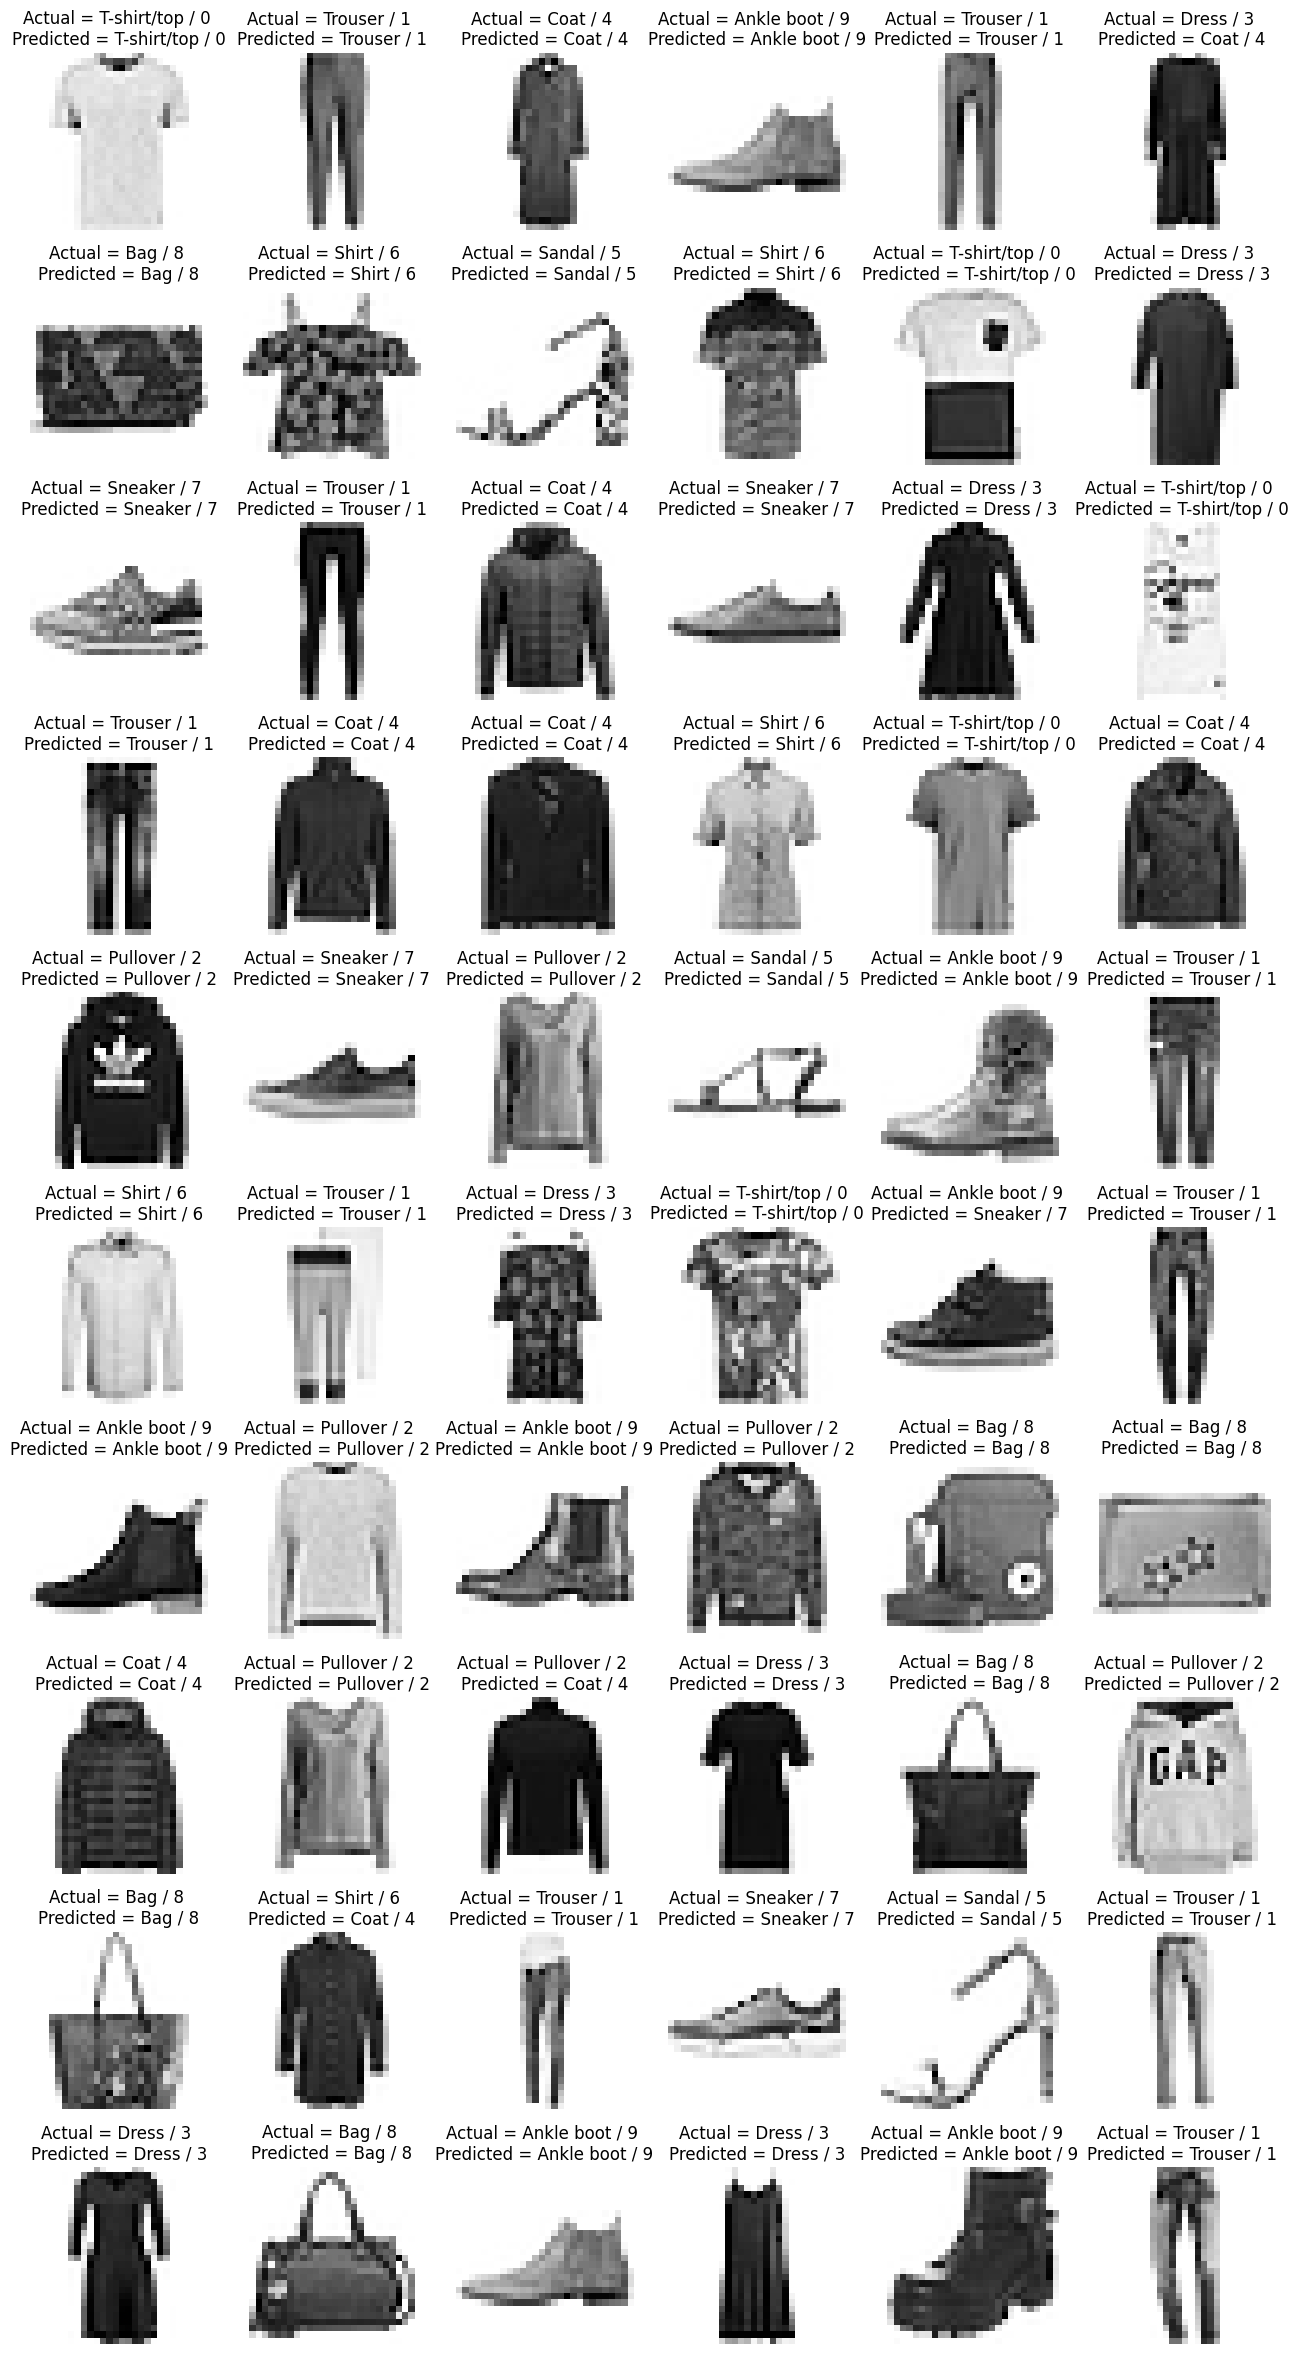

In [118]:
#THe output is
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(test_images[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[test_labels[i]], test_labels[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

<Axes: >

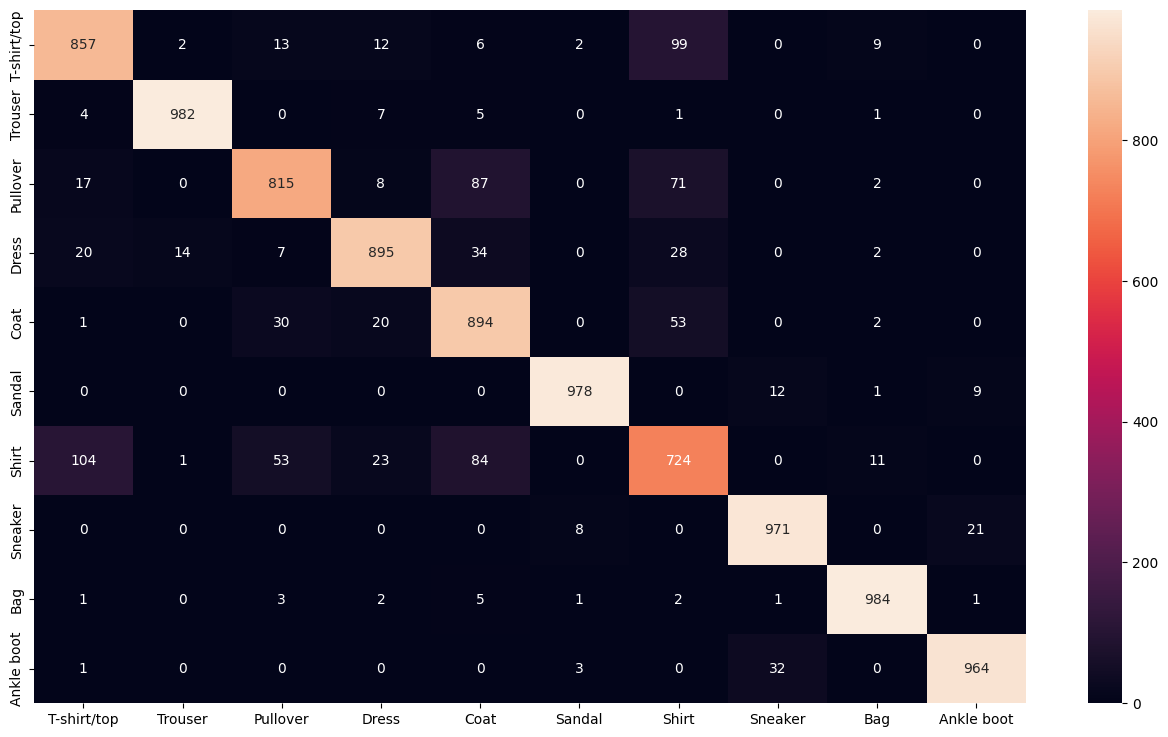

In [119]:
#Heatmap using confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(test_labels, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [120]:
#All the accuracy score
from sklearn.metrics import classification_report
cr= classification_report(test_labels, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.88      0.81      0.85      1000
       Dress       0.93      0.90      0.91      1000
        Coat       0.80      0.89      0.85      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.74      0.72      0.73      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [121]:
model.save('fashion_mnist_cnn_model.z1') # Save the model